In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random


In [ ]:
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data", header= None)

In [ ]:
df.columns= ['parents', 'has_nurs','form','children','housing','finance','social','health', 'nursery']

In [ ]:
df.head()

,parents,has_nurs,form,children,housing,finance,social,health,nursery
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [ ]:
df.describe()

,parents,has_nurs,form,children,housing,finance,social,health,nursery
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [ ]:
df['nursery'].value_counts()

not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: nursery, dtype: int64

In [ ]:
dummies = pd.get_dummies(df.parents, drop_first= True)

# Concatenate the dummies to original dataframe
df = pd.concat([df, dummies], axis='columns')

# drop the values
df.drop(['parents'], axis='columns', inplace= True)

# print the dataframe
print(df)

        has_nurs      form children     housing     finance         social  \
0         proper  complete        1  convenient  convenient        nonprob   
1         proper  complete        1  convenient  convenient        nonprob   
2         proper  complete        1  convenient  convenient        nonprob   
3         proper  complete        1  convenient  convenient  slightly_prob   
4         proper  complete        1  convenient  convenient  slightly_prob   
...          ...       ...      ...         ...         ...            ...   
12955  very_crit    foster     more    critical      inconv  slightly_prob   
12956  very_crit    foster     more    critical      inconv  slightly_prob   
12957  very_crit    foster     more    critical      inconv    problematic   
12958  very_crit    foster     more    critical      inconv    problematic   
12959  very_crit    foster     more    critical      inconv    problematic   

            health     nursery  pretentious  usual  
0      rec

In [ ]:
df['has_nurs'].replace(['proper', 'less_proper', 'improper', 'critical', 'very_crit'],
                        [5, 4 ,3 ,2 , 1], inplace=True)

df['form'].replace(['complete', 'completed', 'incomplete', 'foster'],
                        [ 3 ,3 ,2 , 1], inplace=True)

df['children'].replace(['more'], [4], inplace= True)
df['housing'].replace(['convenient', 'less_conv', 'critical'], [3, 2 ,1], inplace= True)
df['finance'].replace(['convenient', 'inconv'], [2 ,1], inplace= True)
df['social'].replace(['nonprob', 'slightly_prob', 'problematic'], [3, 2 ,1], inplace= True)
df['health'].replace(['recommended', 'priority', 'not_recom'], [3, 2 ,1], inplace= True)


In [ ]:
nursery= df.nursery
df.drop(columns= ["nursery"] , inplace= True)

df= pd.concat([df, nursery], axis= 'columns')

In [ ]:
df

,has_nurs,form,children,housing,finance,social,health,pretentious,usual,nursery
0,5,3,1,3,2,3,3,0,1,recommend
1,5,3,1,3,2,3,2,0,1,priority
2,5,3,1,3,2,3,1,0,1,not_recom
3,5,3,1,3,2,2,3,0,1,recommend
4,5,3,1,3,2,2,2,0,1,priority
...,...,...,...,...,...,...,...,...,...,...
12955,1,1,4,1,1,2,2,0,0,spec_prior
12956,1,1,4,1,1,2,1,0,0,not_recom
12957,1,1,4,1,1,1,3,0,0,spec_prior
12958,1,1,4,1,1,1,2,0,0,spec_prior


In [ ]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3)
    samples.append((X_train, X_test, y_train, y_test))

In [ ]:
samples

[(       has_nurs  form children  housing  finance  social  health  pretentious  \
  3850          1     3        4        3        1       1       2            0   
  8695          5     3        2        3        2       3       2            0   
  9889          4     3        4        3        2       1       2            0   
  10524         3     3        3        1        1       2       3            0   
  3812          1     3        3        2        1       2       1            0   
  ...         ...   ...      ...      ...      ...     ...     ...          ...   
  12884         1     1        3        2        1       2       1            0   
  651           5     1        1        3        2       2       3            0   
  11562         2     3        3        3        2       1       3            0   
  3876          1     3        4        1        2       1       3            0   
  382           5     3        4        3        2       2       2            0   
  
 

In [ ]:
def fitnessfunction(X_train, X_test, y_train, y_test, kernel, c, gamma):
    model= svm.SVC( C= c, kernel= kernel, gamma=gamma)
    model.fit(X_train, y_train)
    print("fit")
    predicted = model.predict(X_test)

    # Model Evaluation Accuracy
    accuracy = round(np.mean(y_test == predicted) * 100, 2)
    return accuracy


In [ ]:
# divide dataset into training and testing sets with 10 different samples


nsamples = 10
accuracies = []
params= []
iteration= 200

kernelList = ['linear', 'rbf', 'sigmoid']
df_sample= pd.DataFrame(columns=['sample#', 'best accuracy', 'c', 'gamma', 'kernel'])

for i in range(nsamples):
    bestC = 0
    bestGamma = 0
    bestAccuracy=0
    X_train, X_test, y_train, y_test = samples[i]

    print("Iterating on sample ", i+1)
    for j in range(1, iteration+1):
        print("iteration ",j)
        kernel= np.random.choice(kernelList)
        C = np.random.uniform(0,10)
        gamma = np.random.uniform(0, 10)
        print(kernel , C, gamma)
        accuracy= fitnessfunction(X_train, X_test, y_train, y_test, kernel, C, gamma)
        if accuracy > bestAccuracy:
                bestAccuracy = accuracy
                bestC= C
                bestGamma= gamma
                bestKernel= kernel


    accuracies.append(bestAccuracy)
    params.append([bestC, bestGamma, bestKernel])

    df_sample.loc[len(df_sample.index)] = [i+1, bestAccuracy, bestC, bestGamma, bestKernel]
    #print(f"Sample {i+1}: Best accuracy = {bestAccuracy}, Best params = {bestNu, bestEpsilon, bestKernel}")
print("Done iterating!\n")

Iterating on sample  1
iteration  1
sigmoid 8.87770927041174 5.384284606635502
fit
iteration  2
linear 1.9880001453705487 3.124768293137917
fit
iteration  3
rbf 5.173271460792071 3.045931942478469
fit
iteration  4
linear 6.895649443566887 5.337664138016589
fit
iteration  5
rbf 1.1080752083046053 5.783773091771588
fit
iteration  6
linear 6.57892218782933 5.331563131676585
fit
iteration  7
sigmoid 1.5648439815604465 6.130924826997318
fit
iteration  8
sigmoid 6.005077890597198 1.9613081243736574
fit
iteration  9
linear 3.7610588072252615 0.8221526327661377
fit
iteration  10
linear 9.388444004121062 2.518835853023554
fit
iteration  11
rbf 4.823182850530947 1.1268778195705809
fit
iteration  12
rbf 4.198409369154696 3.949600035413715
fit
iteration  13
sigmoid 6.195538515376984 1.1555402976598683
fit
iteration  14
rbf 1.7182050106107838 7.0747803012302235
fit
iteration  15
linear 2.478163564889763 6.465510379324134
fit
iteration  16
linear 4.229271306500911 2.9942575325459297
fit
iteration  1

In [ ]:
print(df_sample)

   sample#  best accuracy         c     gamma kernel
0        1          99.00  3.994098  0.156938    rbf
1        2          98.95  3.537254  0.344920    rbf
2        3          99.15  6.393915  0.117114    rbf
3        4          98.79  8.764531  0.119849    rbf
4        5          98.87  2.751582  0.374859    rbf
5        6          99.13  3.594066  0.224640    rbf
6        7          98.95  1.721961  0.388501    rbf
7        8          99.02  0.913850  0.593568    rbf
8        9          98.97  2.949937  0.523257    rbf
9       10          99.15  7.324641  0.118613    rbf


In [ ]:
X_train, X_test, y_train, y_test = samples[df_sample['best accuracy'].idxmax()]


In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC


train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=df_sample['kernel'].iloc[df_sample['best accuracy'].idxmax()],
                                                        C=df_sample['c'].iloc[df_sample['best accuracy'].idxmax()],
                                                        gamma=df_sample['gamma'].iloc[df_sample['best accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

c:\Users\Garima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

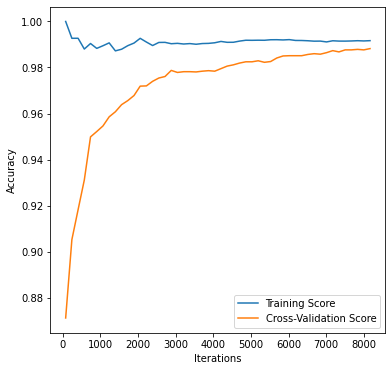

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()